In [1]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 30

In [3]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,

)

Found 4627 files belonging to 5 classes.


In [4]:
class_names= dataset.class_names
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy']

In [5]:
CLASSES = len(class_names)
CLASSES

5

In [6]:
len (dataset)


145

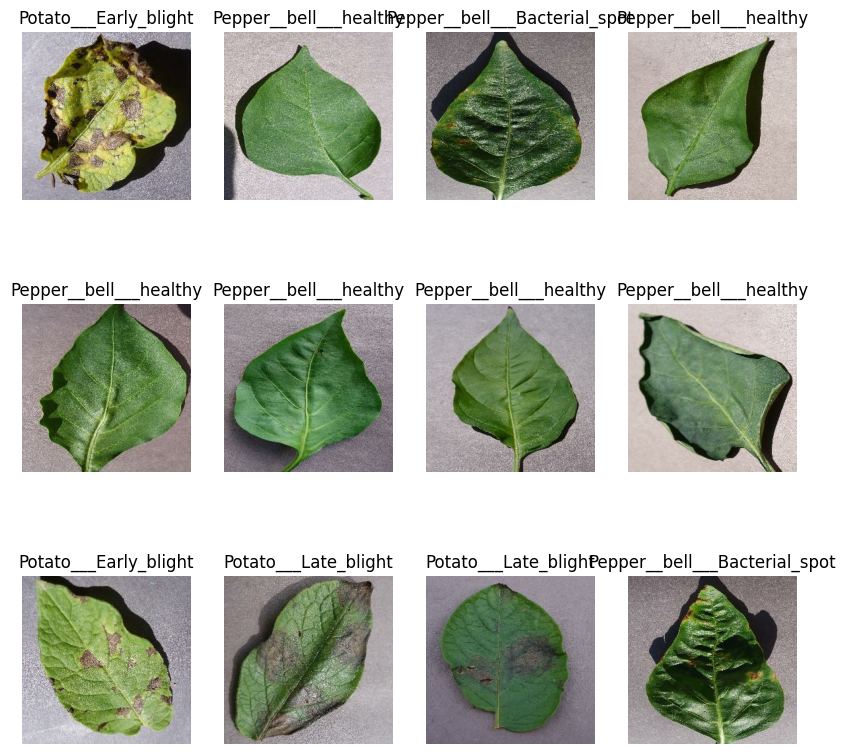

In [7]:
figure = plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

In [8]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    train_ds = dataset.take(int(len(dataset)*train_split))
    trail_ds = dataset.skip(int(len(dataset)*train_split))
    val_ds = trail_ds.take(int(len(dataset)*test_split))
    test_ds = trail_ds.skip(int(len(dataset)*test_split))
    return train_ds, val_ds, test_ds

In [9]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [10]:
len(train_ds)

116

In [11]:
len(val_ds)

14

In [12]:
len(test_ds)

15

In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [14]:
tf.compat.v1.reset_default_graph()

In [15]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1./255),
])

In [16]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])

In [17]:
# Constants
IMAGE_SIZE = 256
CHANNELS = 3

n_classes = CLASSES

# Define input shape (without batch size)
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    layers.Input(shape=input_shape),  
    resize_and_rescale,  
    data_augmentation,   

    # Convolutional and Pooling layers
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=(None,IMAGE_SIZE, IMAGE_SIZE, CHANNELS))
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 278,021 (1.06 MB)

 Trainable params: 278,021 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
history =model.fit(
    
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 119s 965ms/step - accuracy: 0.4237 - loss: 1.3208 - val_accuracy: 0.7388 - val_loss: 0.7087
Epoch 2/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 107s 920ms/step - accuracy: 0.7993 - loss: 0.5632 - val_accuracy: 0.8638 - val_loss: 0.3859
Epoch 3/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 97s 839ms/step - accuracy: 0.8512 - loss: 0.3838 - val_accuracy: 0.8906 - val_loss: 0.3154
Epoch 4/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 105s 908ms/step - accuracy: 0.9028 - loss: 0.2770 - val_accuracy: 0.8594 - val_loss: 0.3560
Epoch 5/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 108s 931ms/step - accuracy: 0.9198 - loss: 0.2267 - val_accuracy: 0.9353 - val_loss: 0.1901
Epoch 6/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 105s 902ms/step - accuracy: 0.9270 - loss: 0.2041 - val_accuracy: 0.9152 - val_loss: 0.2046
Epoch 7/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.9525 - loss: 0.1356 - val_accuracy: 0.9643 - val_loss: 0.0984
Epoch 8/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 98s 846ms/step - accuracy: 0.9506 - loss

In [20]:
scores=model.evaluate(test_ds)
scores

15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - accuracy: 0.9896 - loss: 0.0342


[0.040891099721193314, 0.9871520400047302]

In [21]:
history.history['val_accuracy']

[0.7388392686843872,
 0.8638392686843872,
 0.890625,
 0.859375,
 0.9352678656578064,
 0.9151785969734192,
 0.9642857313156128,
 0.96875,
 0.9464285969734192,
 0.9620535969734192,
 0.9352678656578064,
 0.9642857313156128,
 0.9620535969734192,
 0.9732142686843872,
 0.9352678656578064,
 0.96875,
 0.9575892686843872,
 0.9553571343421936,
 0.96875,
 0.9888392686843872,
 0.9776785969734192,
 0.9508928656578064,
 0.9776785969734192,
 0.9665178656578064,
 0.9821428656578064,
 0.9620535969734192,
 0.96875,
 0.9084821343421936,
 0.9821428656578064,
 0.9799107313156128]

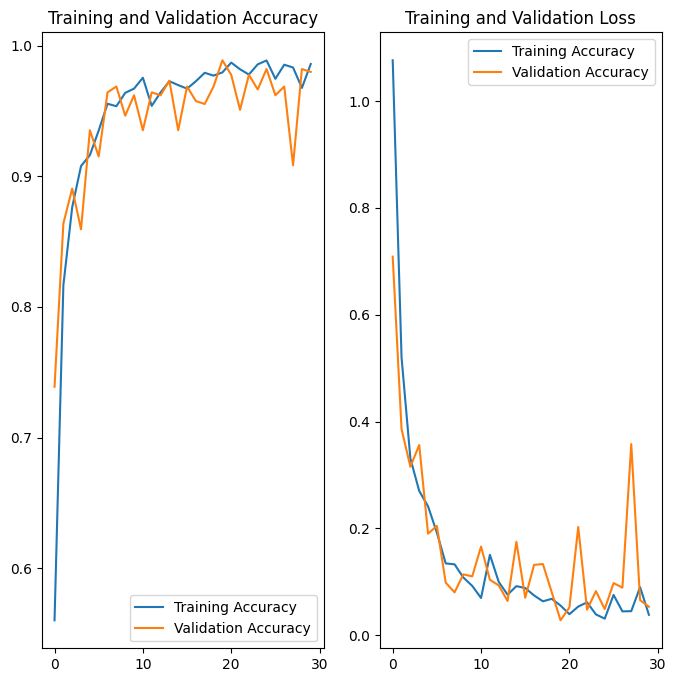

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Accuracy')
plt.plot(range(EPOCHS), val_loss, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


first image to predict
actual label: Pepper__bell___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
predicted label: Pepper__bell___healthy


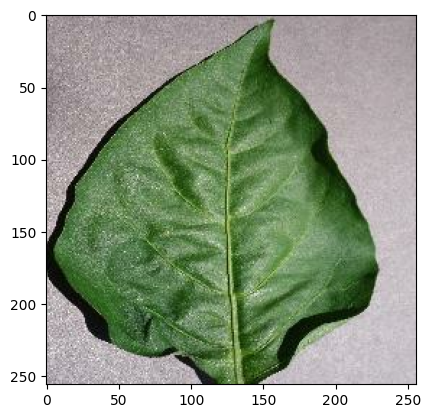

In [23]:
import numpy as np

for images_batch, label_batch in val_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [24]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


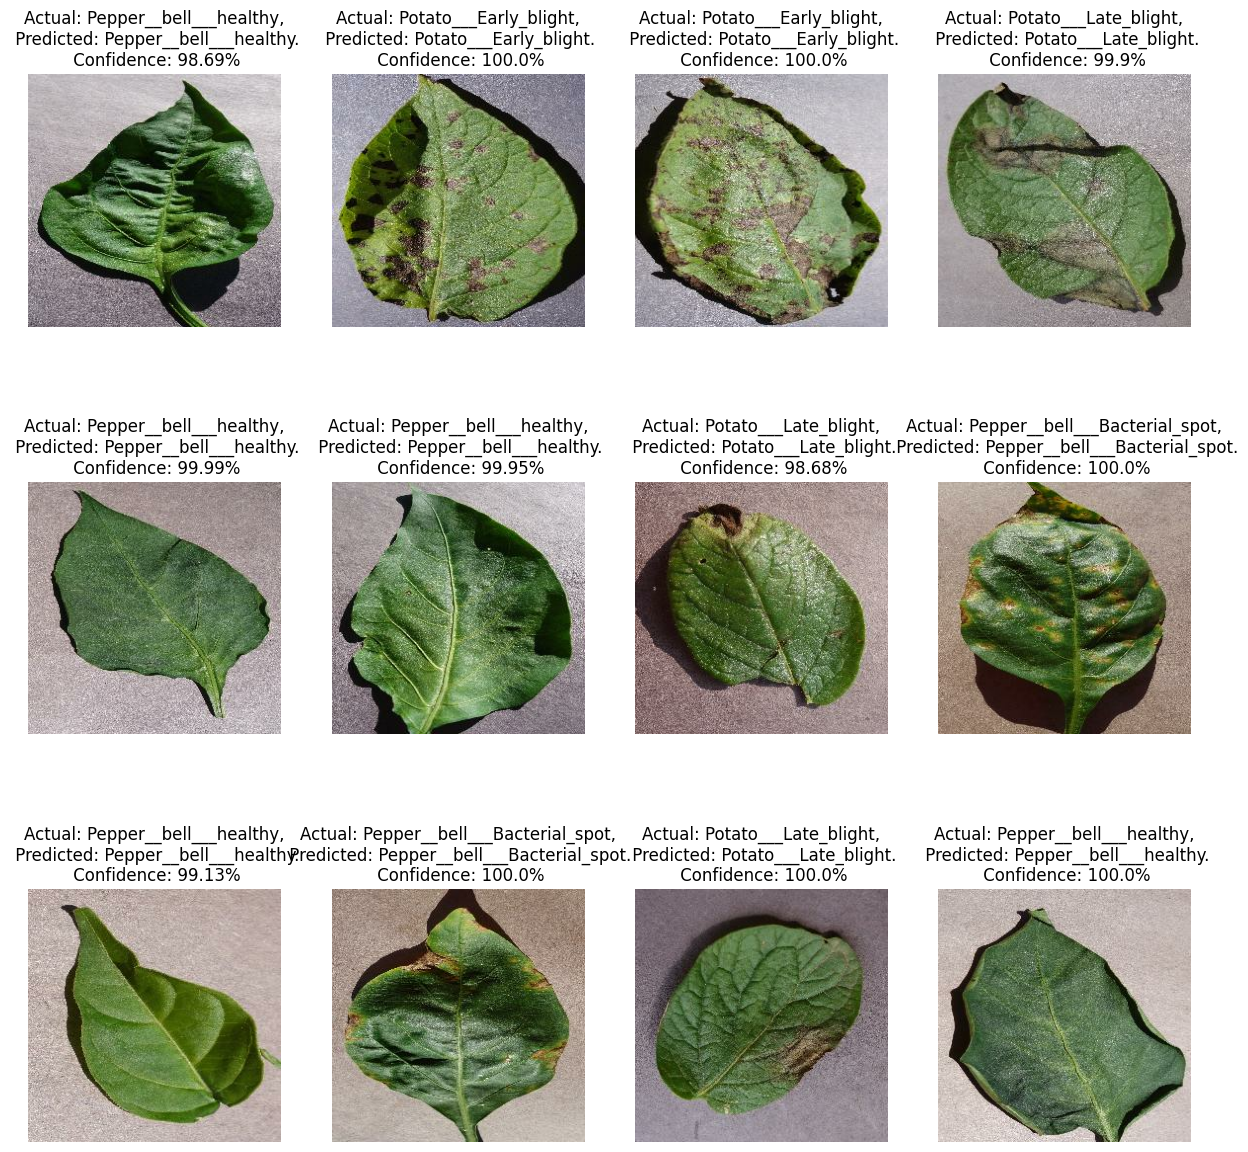

In [25]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        
        plt.axis("off")


In [26]:
import os
model_version =max([int(i) for i in os.listdir("./models") + [0]]) + 1

model.export(f"./models/{model_version}")

INFO:tensorflow:Assets written to: ./models/3\assets


INFO:tensorflow:Assets written to: ./models/3\assets


Saved artifact at './models/3'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  1909474817424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1909474817616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1909474819344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1909474819152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1909477851984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1909477852944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1909477852560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1909477853328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1909477852752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1909477853712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1909477853520: TensorSpec(shape=(), dtyp